<h1><center> Google Search Analysis Using Python </center></h1>

## importing necessary libraies ##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

import plotly.express as px

from pytrends.request import TrendReq
trends = TrendReq()

%matplotlib inline

now we creating a dataframe of top 40 countries which search for 'amazon' on google

In [2]:
trends.build_payload (kw_list=["amazon"])
data= trends.interest_by_region()
data = data.sort_values (by="amazon", ascending=False)
data = data.head(30)
print(data)

                      amazon
geoName                     
Germany                  100
Italy                     98
Austria                   96
Spain                     93
United Kingdom            93
United States             78
Canada                    60
France                    60
Ireland                   45
India                     42
Japan                     35
United Arab Emirates      35
Dominican Republic        32
Mexico                    29
Belgium                   28
Ecuador                   20
Venezuela                 20
Australia                 17
Portugal                  17
Switzerland               15
Singapore                 15
Israel                    14
Colombia                  12
Brazil                    12
Chile                     10
Pakistan                  10
Peru                       9
Saudi Arabia               9
Netherlands                7
Egypt                      7


here 100 indicates the county with most search and 0 indicates least search or not enough data




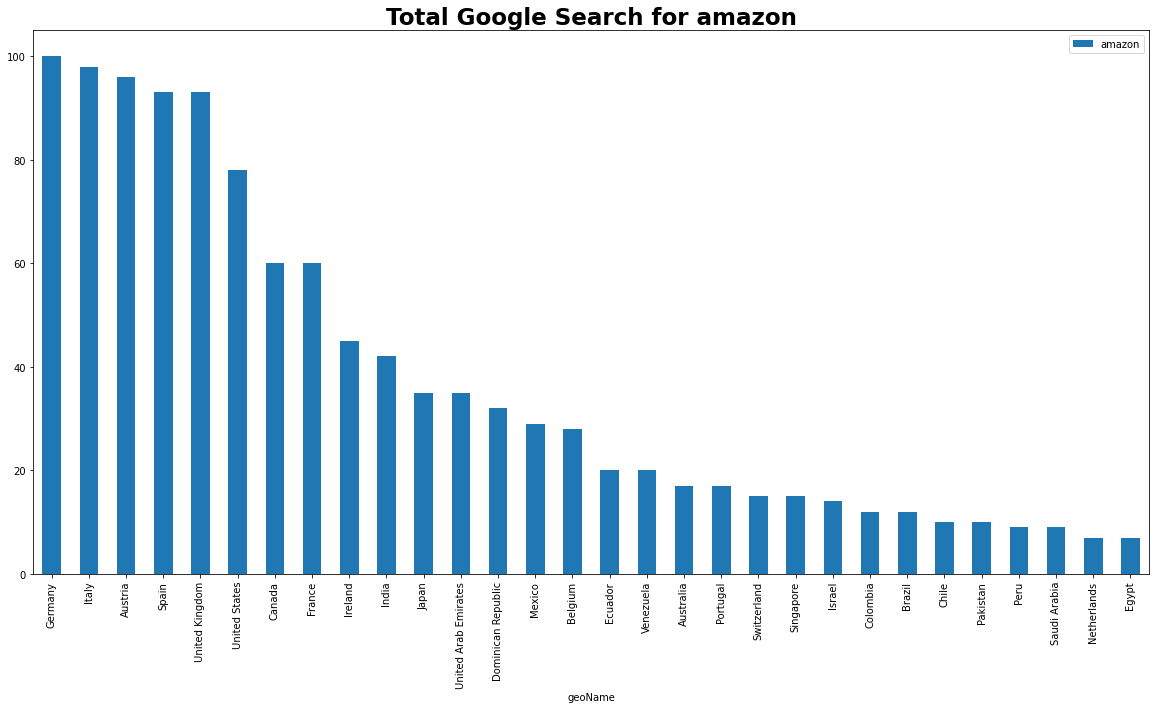

In [3]:
data.reset_index().plot(x="geoName",y="amazon",figsize=(20,10),kind="bar")
plt.style.use('fivethirtyeight')
plt.rc('font',size=16)
plt.title('Total Google Search for amazon',fontweight='bold')
plt.show()

According to Above BarChart results,we can easily able to say that search query based on "amazon" are mostly done in Germany,Italy,Austria,Spain and United Kingdom.

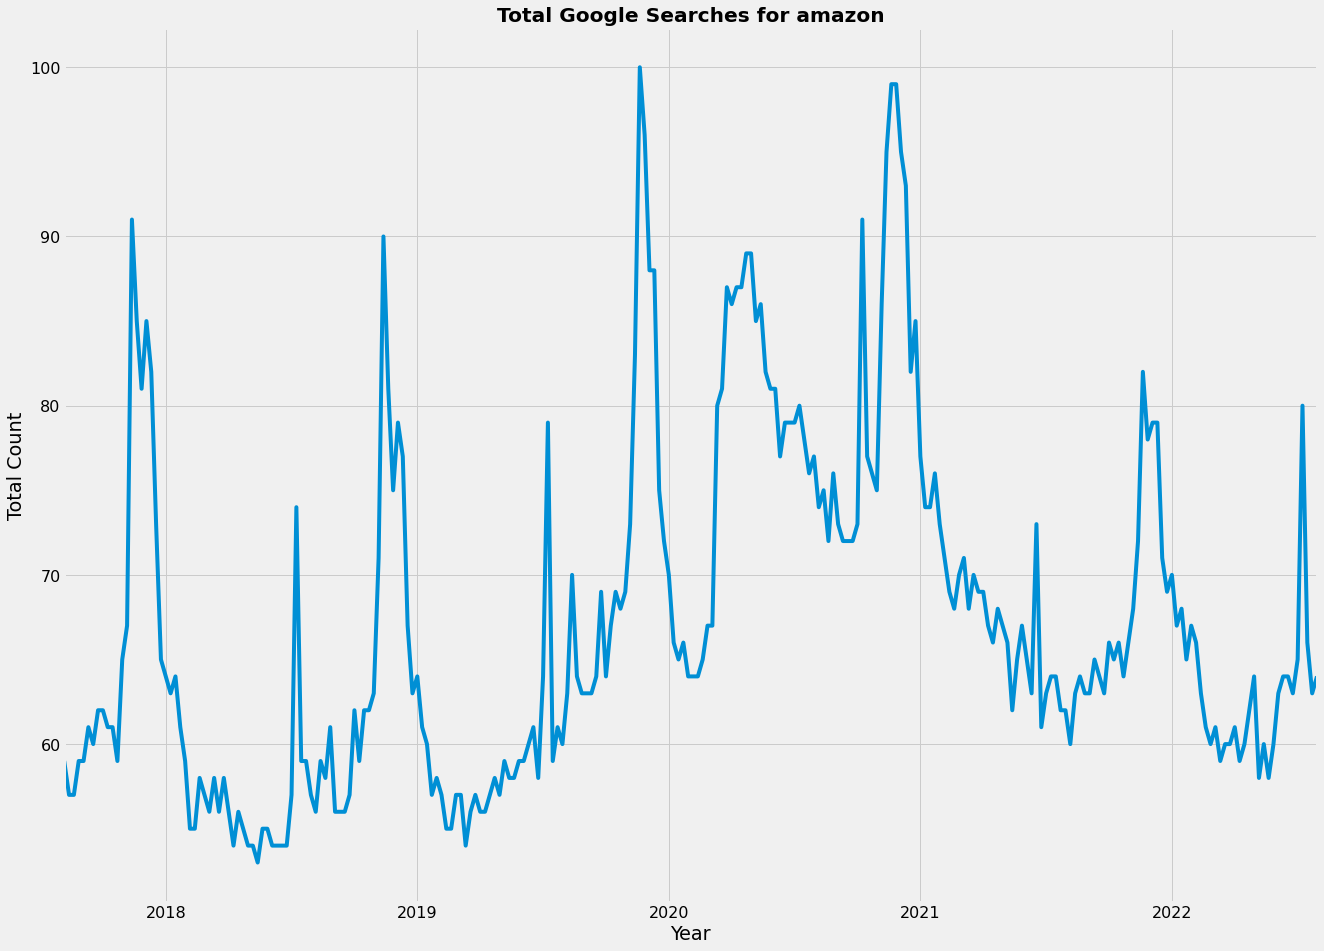

In [4]:
data = TrendReq(hl='en-US', tz=360)
data.build_payload (kw_list=['amazon'])
data = data.interest_over_time()
fig, ax = plt.subplots(figsize=(20, 15)) 
data['amazon'].plot()
plt.style.use('fivethirtyeight')
plt.title('Total Google Searches for amazon', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.show()

So as we all know that amazon has been the focus of so many countries for last few years,so this is a trend of searches to see how the total search queries based on amazon increase or ddecrease yearly on Google

### if we want to compare more than one keyword than it is also posssibe ( limit of keywods is 5 ) ###

In [5]:
kw_list=['Facebook', 'Apple', 'Amazon', 'Netflix', 'Google']
trends.build_payload(kw_list=kw_list)
data= trends.interest_by_region()
data = data.sort_values(by=kw_list, ascending=False)
data = data.head(10)
print(data)

              Facebook  Apple  Amazon  Netflix  Google
geoName                                               
Argentina           69      0       1        8      22
Peru                67      0       1        6      26
South Africa        63      3       2        5      27
Ecuador             63      1       4        5      27
Turkey              58      3       2        6      31
Poland              58      1       1        5      35
Portugal            55      2       3        5      35
Colombia            55      1       3        8      33
Mexico              51      2       7        7      33
Egypt               48      1       3        1      47


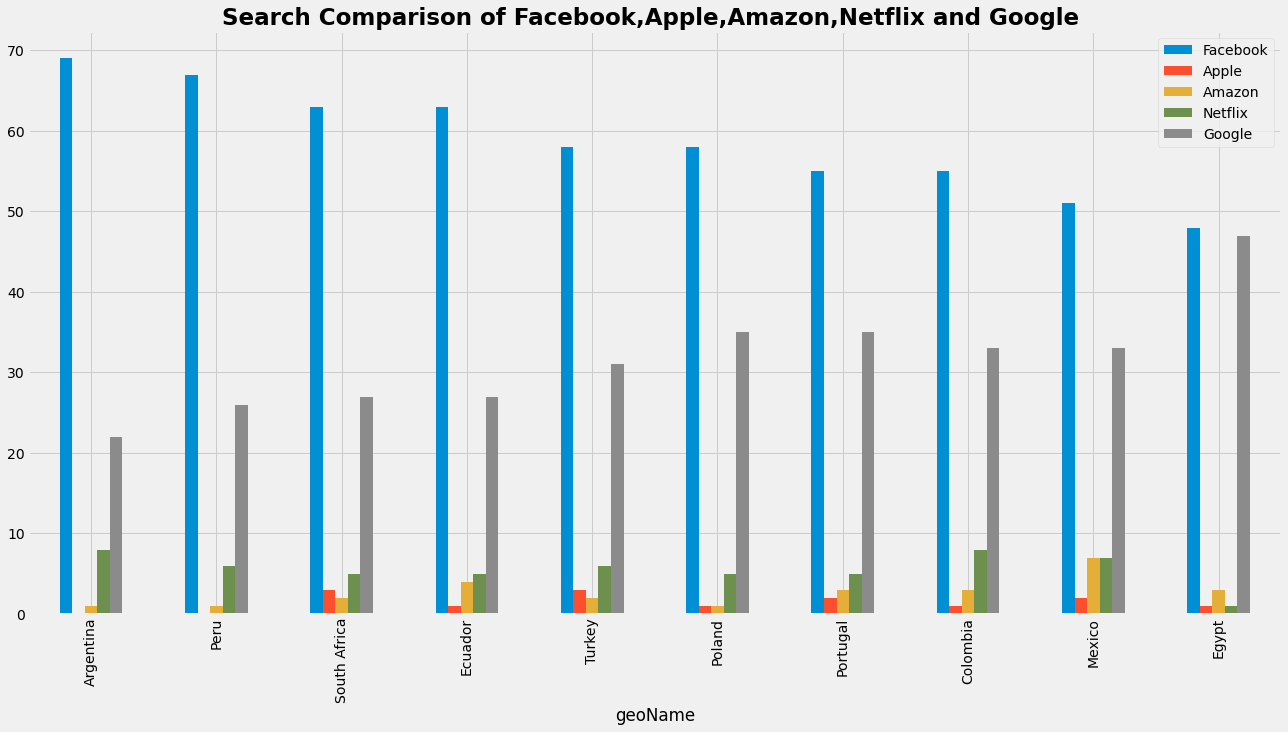

In [6]:
data.reset_index().plot(x="geoName",y=kw_list,figsize=(20,10),kind="bar")
plt.style.use('fivethirtyeight')
plt.rc('font',size=16)
plt.title('Search Comparison of Facebook,Apple,Amazon,Netflix and Google ',fontweight='bold')
plt.show()

### trending_searches attribute of pytrend is usefull for find trending search queries in particular country ###

In [7]:
data = TrendReq(hl='en-US', tz=360)
data = data.trending_searches(pn='india')
data

,0
0,Mahesh Babu
1,RRB
2,Pete Davidson
3,Karbala
4,The Hundred
5,Adrien Rabiot
6,World Indigenous Day
7,Jasprit Bumrah
8,Asia Cup 2022
9,Odisha Result


trending searches in time for India

###  realtime_trending_searches() Attribute is usefull for finding  real time trending search queries in particular country ###

In [8]:
data = TrendReq(hl='en-US', tz=360)
data = data.realtime_trending_searches(pn='IN')
# data.to_string() for print complete data
data

,title,entityNames
0,"Stock market, JPMorgan Chase, Stock, Rally","[Stock market, JPMorgan Chase, Stock, Rally]"
1,"Pradeep Patwardhan, Marathi language","[Pradeep Patwardhan, Marathi language]"
2,"Mehndi, Raksha Bandhan","[Mehndi, Raksha Bandhan]"
3,"Maharashtra, Eknath Shinde, Devendra Fadnavis,...","[Maharashtra, Eknath Shinde, Devendra Fadnavis..."
4,"Magnachip, 2022, NYSE:MX, Semiconductor, New Y...","[Magnachip, 2022, NYSE:MX, Semiconductor, New ..."
5,"India, Khadi","[India, Khadi]"
6,"Railway Recruitment Board Exam (RRB) Group D, ...","[Railway Recruitment Board Exam (RRB) Group D,..."
7,"Rashtriya Janata Dal, Nitish Kumar, National D...","[Rashtriya Janata Dal, Nitish Kumar, National ..."
8,"Nurul Hasan, Asia Cup, Bangladesh national cri...","[Nurul Hasan, Asia Cup, Bangladesh national cr..."
9,"Shia Islam, Ashura","[Shia Islam, Ashura]"


####  finding A suggestions for autoCompletion of keyword "amazon" . it Returns the results from the “Add a search term” input box in the google trends UI. ####

In [9]:
import pandas as pd
from pytrends.request import TrendReq
pytrend = TrendReq()
# Get Google Keyword Suggestions
keywords = pytrend.suggestions(keyword='Amazon')
df = pd.DataFrame(keywords)
df.head(5)

,mid,title,type
0,/m/0mgkg,Amazon.com,E-commerce company
1,/m/0gvlgh,Amazon Prime Video,Television channel
2,/g/11b6x7cx6n,Amazon Prime,Topic
3,/m/0cx4p,Amazon Rainforest,Forest in Brazil
4,/m/0sd7,Amazon River,River in South America


### Top Trending Charts According to Year 2021 ###

In [10]:
df = pytrend.top_charts(2021, hl='en-US', tz=300, geo='GLOBAL')
df.head(10)

,title,exploreQuery
0,Australia vs India,
1,India vs England,
2,IPL,
3,NBA,
4,Euro 2021,
5,Copa América,Copa America
6,India vs New Zealand,
7,T20 World Cup,
8,Squid Game,
9,DMX,


# Hitesh R Vaghela #

complete code Available on GitHub - https://github.com/hitesh-vaghela-2706 